# Search and visualize biomedical knowledge graphs

[Christian Ebeling](mailto:Christian.Ebeling@scai.fraunhofer.de), [Bruce Schultz](mailto:Bruce.Schultz@scai.fraunhofer.de)

[Department of Bioinformatics, Fraunhofer Institute for Algorithms and Scientific Computing (SCAI), Sankt
Augustin 53754, Germany](https://www.scai.fraunhofer.de/en/business-research-areas/bioinformatics.html)


## Summary

The Biological Expression Language (**BEL**) is a domain specific language for representing biological observations in a computable form, along with contextual information. Scientific findings from literature can easily be translated (manual or by text-mining algorithsm) to BEL statments and annotations defining the relevant biomedical context. The [syntax](https://language.bel.bio/language/) of BEL is easy to learn for biologists and scientists in the biomedical field. The resulting BEL files can be loaded with the software ***e(BE:L)*** into knowledge graphs in order to query and analyse the knowledge. Please go to the [ebel GitHub homepage](https://github.com/e-bel/) to learn how to import, query, extend and analyze BEL knowledge graphs. The knowledge in the graph can be extended with an extensive number of other biomedical knowldge bases. The resulting graph have a lot more relationships which can be queried and analyzed via a REST-API. 

### Focus of this notebook

This Jupyter notebook focuses on the possibilities to query and visualize the resulting paths/pathways. An other notebook [here](BELish.ipynb) demonstrates in more detail the possibilities of BELish.

### Background to methods in this notebook

In general the helper functions `search_path` below in this notebook calls the `paths_as_dot` function from the API-REST server. Depending on your server configuration this could be on your own machine [here](http://127.0.0.1:5000/ui/#/)([paths_as_dot](http://127.0.0.1:5000/ui/#/BEL/ebel.web.api.ebel.v1.bel.get_paths_as_dot)) or http://server_name/ui/#. The API `paths_as_dot` method returns a DOT(GraphViz) string which is a popular way to share pathways for vizualisation. Many IDEs like (Integrated Development enviroments, e.g. VSCode, ATOM, eclipse) and applications can read and render DOT files/strings. In this notebook we use Python and the graphviz library to show the path search results. 


**Contact**: Christian.Ebeling@scai.fraunhofer.de. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Focus-of-this-notebook" data-toc-modified-id="Focus-of-this-notebook-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Focus of this notebook</a></span></li><li><span><a href="#Background-to-methods-in-this-notebook" data-toc-modified-id="Background-to-methods-in-this-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background to methods in this notebook</a></span></li></ul></li><li><span><a href="#Search-by-node-class" data-toc-modified-id="Search-by-node-class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Search by node class</a></span><ul class="toc-item"><li><span><a href="#start" data-toc-modified-id="start-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>start</a></span></li><li><span><a href="#end" data-toc-modified-id="end-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>end</a></span></li></ul></li><li><span><a href="#Search-by-namespace" data-toc-modified-id="Search-by-namespace-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Search by namespace</a></span><ul class="toc-item"><li><span><a href="#start" data-toc-modified-id="start-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>start</a></span></li><li><span><a href="#end" data-toc-modified-id="end-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>end</a></span></li></ul></li><li><span><a href="#Search-by-node-name" data-toc-modified-id="Search-by-node-name-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Search by node name</a></span><ul class="toc-item"><li><span><a href="#start" data-toc-modified-id="start-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>start</a></span></li><li><span><a href="#end" data-toc-modified-id="end-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>end</a></span></li></ul></li><li><span><a href="#Path-length" data-toc-modified-id="Path-length-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Path length</a></span><ul class="toc-item"><li><span><a href="#Range" data-toc-modified-id="Range-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Range</a></span></li><li><span><a href="#Excat" data-toc-modified-id="Excat-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Excat</a></span></li></ul></li><li><span><a href="#Relations-on-path" data-toc-modified-id="Relations-on-path-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Relations on path</a></span><ul class="toc-item"><li><span><a href="#BEL" data-toc-modified-id="BEL-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>BEL</a></span><ul class="toc-item"><li><span><a href="#Relation-types" data-toc-modified-id="Relation-types-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Relation types</a></span></li><li><span><a href="#Relation-groups" data-toc-modified-id="Relation-groups-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Relation groups</a></span><ul class="toc-item"><li><span><a href="#causal" data-toc-modified-id="causal-6.1.2.1"><span class="toc-item-num">6.1.2.1&nbsp;&nbsp;</span>causal</a></span></li><li><span><a href="#correlative" data-toc-modified-id="correlative-6.1.2.2"><span class="toc-item-num">6.1.2.2&nbsp;&nbsp;</span>correlative</a></span></li><li><span><a href="#genomic" data-toc-modified-id="genomic-6.1.2.3"><span class="toc-item-num">6.1.2.3&nbsp;&nbsp;</span>genomic</a></span></li><li><span><a href="#deprecated" data-toc-modified-id="deprecated-6.1.2.4"><span class="toc-item-num">6.1.2.4&nbsp;&nbsp;</span>deprecated</a></span></li><li><span><a href="#compiler" data-toc-modified-id="compiler-6.1.2.5"><span class="toc-item-num">6.1.2.5&nbsp;&nbsp;</span>compiler</a></span></li></ul></li></ul></li><li><span><a href="#e(BE:L)" data-toc-modified-id="e(BE:L)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>e(BE:L)</a></span><ul class="toc-item"><li><span><a href="#Nodes" data-toc-modified-id="Nodes-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Nodes</a></span></li><li><span><a href="#Relations" data-toc-modified-id="Relations-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Relations</a></span></li></ul></li><li><span><a href="#Mutiple-relation-types" data-toc-modified-id="Mutiple-relation-types-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Mutiple relation types</a></span><ul class="toc-item"><li><span><a href="#Combing-BEL-relations" data-toc-modified-id="Combing-BEL-relations-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Combing BEL relations</a></span></li><li><span><a href="#Combing-e(BE:L)-relations" data-toc-modified-id="Combing-e(BE:L)-relations-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Combing e(BE:L) relations</a></span></li><li><span><a href="#Combing-BEL-and-e(BE:L)-relations" data-toc-modified-id="Combing-BEL-and-e(BE:L)-relations-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Combing BEL and e(BE:L) relations</a></span></li></ul></li></ul></li><li><span><a href="#Search-by-PubMed-Identifier(s)" data-toc-modified-id="Search-by-PubMed-Identifier(s)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Search by PubMed Identifier(s)</a></span><ul class="toc-item"><li><span><a href="#Serach-for-a-single-PubMed-Identifier" data-toc-modified-id="Serach-for-a-single-PubMed-Identifier-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Serach for a single PubMed Identifier</a></span></li><li><span><a href="#Search-for-a-list-of-PubMed-Identifiers" data-toc-modified-id="Search-for-a-list-of-PubMed-Identifiers-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Search for a list of PubMed Identifiers</a></span></li></ul></li><li><span><a href="#Avoiding-meta-nodes" data-toc-modified-id="Avoiding-meta-nodes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Avoiding meta nodes</a></span></li><li><span><a href="#Search-by-by-MeSH-term(s)" data-toc-modified-id="Search-by-by-MeSH-term(s)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Search by by MeSH term(s)</a></span><ul class="toc-item"><li><span><a href="#single-term" data-toc-modified-id="single-term-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>single term</a></span></li><li><span><a href="#list-of-terms" data-toc-modified-id="list-of-terms-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>list of terms</a></span></li></ul></li><li><span><a href="#BELish" data-toc-modified-id="BELish-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>BELish</a></span><ul class="toc-item"><li><span><a href="#BELish-for-nodes" data-toc-modified-id="BELish-for-nodes-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>BELish for nodes</a></span></li><li><span><a href="#BELish-for-relations" data-toc-modified-id="BELish-for-relations-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>BELish for relations</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#One-edge-forward" data-toc-modified-id="One-edge-forward-10.3.1"><span class="toc-item-num">10.3.1&nbsp;&nbsp;</span>One edge forward</a></span></li><li><span><a href="#One-edge-backward" data-toc-modified-id="One-edge-backward-10.3.2"><span class="toc-item-num">10.3.2&nbsp;&nbsp;</span>One edge backward</a></span></li><li><span><a href="#Using-wildcards-(%)" data-toc-modified-id="Using-wildcards-(%)-10.3.3"><span class="toc-item-num">10.3.3&nbsp;&nbsp;</span>Using wildcards (%)</a></span></li><li><span><a href="#Box-Nodes" data-toc-modified-id="Box-Nodes-10.3.4"><span class="toc-item-num">10.3.4&nbsp;&nbsp;</span>Box Nodes</a></span><ul class="toc-item"><li><span><a href="#Simple-node-classes" data-toc-modified-id="Simple-node-classes-10.3.4.1"><span class="toc-item-num">10.3.4.1&nbsp;&nbsp;</span>Simple node classes</a></span></li><li><span><a href="#Node-class-groups" data-toc-modified-id="Node-class-groups-10.3.4.2"><span class="toc-item-num">10.3.4.2&nbsp;&nbsp;</span>Node class groups</a></span></li><li><span><a href="#with-parameters" data-toc-modified-id="with-parameters-10.3.4.3"><span class="toc-item-num">10.3.4.3&nbsp;&nbsp;</span>with parameters</a></span></li></ul></li><li><span><a href="#Several-edges" data-toc-modified-id="Several-edges-10.3.5"><span class="toc-item-num">10.3.5&nbsp;&nbsp;</span>Several edges</a></span></li><li><span><a href="#Edges-with-optional-relation-types" data-toc-modified-id="Edges-with-optional-relation-types-10.3.6"><span class="toc-item-num">10.3.6&nbsp;&nbsp;</span>Edges with optional relation types</a></span></li><li><span><a href="#Relation-type-groups" data-toc-modified-id="Relation-type-groups-10.3.7"><span class="toc-item-num">10.3.7&nbsp;&nbsp;</span>Relation type groups</a></span></li></ul></li></ul></li><li><span><a href="#No-results" data-toc-modified-id="No-results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>No results</a></span></li><li><span><a href="#Using-limit" data-toc-modified-id="Using-limit-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Using limit</a></span></li><li><span><a href="#Hierarchical-tree-structure-of-relation-and-node-types" data-toc-modified-id="Hierarchical-tree-structure-of-relation-and-node-types-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Hierarchical tree structure of relation and node types</a></span><ul class="toc-item"><li><span><a href="#BEL-node-type" data-toc-modified-id="BEL-node-type-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>BEL node type</a></span></li><li><span><a href="#BEL-relation-types" data-toc-modified-id="BEL-relation-types-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>BEL relation types</a></span></li><li><span><a href="#e(BE:L)-node-types" data-toc-modified-id="e(BE:L)-node-types-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>e(BE:L) node types</a></span></li><li><span><a href="#e(BE:L)-relation-types" data-toc-modified-id="e(BE:L)-relation-types-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>e(BE:L) relation types</a></span></li></ul></li></ul></div>

Please go straight to the first header to learn how to search for pathways in the knowledge graph. The following cells are only set up the configurations and provides some helper methods.

In [1]:
server = "https://api.ebel.scai.fraunhofer.de"
api_version = "/api/v1/"
api_base = server + api_version
pics_folder = "api_path_search_pics"

In [2]:
from ebel import Bel
import pandas as pd
import requests
import graphviz
import json
import os
import re
from typing import Optional
from collections import namedtuple
from pprint import pprint
from IPython.display import display, SVG, Image

The next method is just a simple helper method to display the response in dot file format

In [3]:
def search_path(start_node_class: Optional[str] = None,
                start_node_namespace: Optional[str] = None,
                start_node_name: Optional[str] = None,
                connecting_relation: Optional[str] = None,
                multiple_connecting_relations: Optional[str] = None,
                connecting_node_class: Optional[str] = None,
                mesh_term: Optional[str] = None,
                pmid: Optional[str] = None,
                end_node_class: Optional[str] = None,
                end_node_namespace: Optional[str] = None,
                end_node_name: Optional[str] = None,
                only_gene_related_nodes_on_path: Optional[str] = None,
                min_path_length: Optional[int] = None,
                max_path_length: Optional[int] = None,
                pmids: Optional[str] = None,
                limit: Optional[int] = None,
                print_url: Optional[bool] = False,
                as_image: bool = False
               ):
    params = {
        'start_node_class': start_node_class,
        'start_node_namespace': start_node_namespace,
        'start_node_name': start_node_name,
        'connecting_relation': connecting_relation,
        'multiple_connecting_relations': multiple_connecting_relations,
        'connecting_node_class': connecting_node_class,
        'mesh_term': mesh_term,
        'pmid': pmid,
        'end_node_class': end_node_class,
        'end_node_namespace': end_node_namespace,
        'end_node_name': end_node_name,
        'only_gene_related_nodes_on_path': only_gene_related_nodes_on_path,
        'min_path_length': min_path_length,
        'max_path_length': max_path_length,
        'pmids': pmids,
        'limit': limit
    }
    params = {k:v for k,v in params.items() if v}
    method = "bel/paths_as_dot"
    if as_image:
        display_dot_as_image(params, method, print_url)
    else:
        display_dot(params, method, print_url)

def search_path_by_belish(belish:str, limit=30, print_url=False):
    params = {'belish': belish, 'limit': limit}
    method = "bel/paths_by_belish_as_dot"
    display_dot(params, method, print_url)

def display_dot(params, method, print_url=False):
    req = requests.get(api_base + method, params=params)
    if print_url:
        print(req.url)
    dot_str = json.loads(req.text)
    if isinstance(dot_str, dict):
        return pprint(dot_str)
    display(graphviz.Source(dot_str))

    
def display_dot_as_image(params, method, print_url=False):
    req = requests.get(api_base + method, params=params)
    if print_url:
        print(req.url)
    dot_str = json.loads(req.text)
    if isinstance(dot_str, dict):
        return pprint(dot_str)
    file_name = re.sub('\W+','_',"_".join([f"{k}_{v}" for k,v in params.items()]))
    file_path = os.path.join(pics_folder, file_name)
    pics_path = graphviz.Source(dot_str, filename=file_path, format="png").render()
    display(Image(filename=pics_path))
    
def show_classes_as_graph(class_type: str):
    dot_str = json.loads(requests.get(f'{api_base}{class_type}_types_as_dot').text)
    file_path = os.path.join(pics_folder, class_type.replace('/', '_'))
    pics_path = graphviz.Source(dot_str, filename=file_path, format="png").render()
    display(Image(filename=pics_path, width=300))

def show_classes_as_table(class_type: str):
    classes = json.loads(requests.get(f'{api_base}{class_type}_types').text)
    Row = namedtuple('Row', ['name', 'children', 'parents_path', 'abstract'])
    data = []
    for k,v in classes.items():
        children_names = [x['name'] for x in v['children']]
        row = Row(k, children_names, v['parents_path'][1:-1], v['abstract'])
        data.append(row)
    return pd.DataFrame(data).set_index('name')

def get_api_results(method, **params):
    return json.loads(requests.get(f'{api_base}{method}', params=params).text)

In [4]:
def get_example_multi_bel(relation='causal', path_length=2):
    r = get_api_results('bel/paths', 
                        connecting_relation=relation, 
                        min_path_length=path_length, 
                        max_path_length=path_length, 
                        limit=1)
    p = r['edge_paths_by_length'][str(path_length)][0]
    e = r['unique_edges']
    belish = ''
    for i in range(len(p)):
        belish += e[p[i]]['subject_bel']+ " -" + e[p[0]]['class'] + "-> "
    belish += e[p[-1]]['object_bel']

    return belish

def get_doc_for_api_method(method_path: str):
    """Gets documentation form API for specific path"""
    json_data = json.loads(requests.get(server + "/openapi.json").text)
    description = json_data['paths'][api_version + method_path]['get']['description']
    print("Description\n","="*10+"\n",description)
    data = json_data['paths'][api_version + method_path]['get']['parameters']
    pd_df_data = []
    cols=['parameter name', 'data type', 'description', 'example']
    for x in data:
        param_props = (x['name'], 
                       x['schema']['type'], 
                       x.get('description'), x['schema'].get('example'))
        pd_df_data.append(param_props)
    return pd.DataFrame(pd_df_data, columns=cols).set_index('parameter name')

## Search by node class

see also [Using limit](#Using-limit), [Hierarchical tree structure of relation and node types](Hierarchical-tree-structure-of-relation-and-node-types)

In [5]:
get_doc_for_api_method('bel/paths_as_dot')

Description
 Method to find all directed paths between genes using BEL or e(BE:L) edges. 
The search algorithm is an iterative process starting from 1 up to 5 edges.
The method returns a DOT string which can be used to visualize the graph.
See also the method paths to get objets for paths, unique edge and nodes.



,data type,description,example
parameter name,,,
start_node_class,string,Start node class of a path like protein,protein
start_node_namespace,string,Namespace of start node in which a name is valid.,None
start_node_name,string,Start node name of a path.,None
connecting_relation,string,Connecting relation types over all edges in th...,None
multiple_connecting_relations,string,Multiple connecting relation types seperated b...,None
connecting_node_class,string,All node classes between start and end.,None
mesh_term,string,One or several MeSH term(s) seperated by semic...,None
pmid,string,One or several PubMed Identifier(s) seperated ...,None
end_node_class,string,End node class of a path like protein,None


Following parameters can be used with the `search_path` method:

| Parameter name | data type | default
| --- | --- | --- |
| start_node_class | 
| start_node_namespace |
| start_node_name |
| connecting_relation |
| multiple_connecting_relations': multiple_connecting_relations,
        'connecting_node_class': connecting_node_class,
        'mesh_term': mesh_term,
        'pmid': pmid,
        'end_node_class': end_node_class,
        'end_node_namespace': end_node_namespace,
        'end_node_name': end_node_name,
        'only_gene_related_nodes_on_path': only_gene_related_nodes_on_path,
        'min_path_length': min_path_length,
        'max_path_length': max_path_length,
        'pmids': pmids,
        'limit': limit


1. start_node_class: str [default=protein]
2. start_node_namespace: str [default=HGNC]
3. start_node_name: str
4. connecting_edge_class: str
5. end_node_class: str [default=protein]
6. end_node_namespace [default=HGNC]
7. end_node_name: str
8. gene_related_nodes_on_path: str [default='true'] ('true'|'false') 
9. min_path_length [default=1] (1-10)
10. max_path_length [default=3]
11. limit: int (should only be used for demonstration issues, avoid server rejects by too big query results) 

For further documentation visit the server + "/ui/#/BEL/ebel.web.api.ebel.v1.bel.get_paths"


If you using localhost as server it's [here](http://127.0.0.1:5000/ui/#/BEL/ebel.web.api.ebel.v1.bel.get_paths)

### start

any relation type

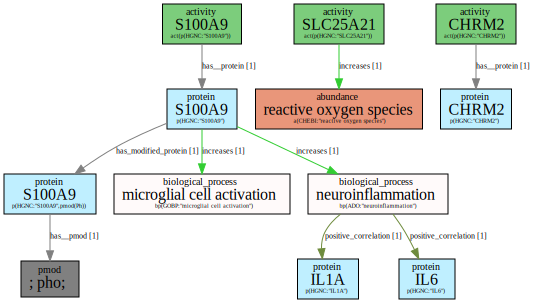

In [6]:
dot_str = search_path(start_node_class="activity", limit=3)

### end

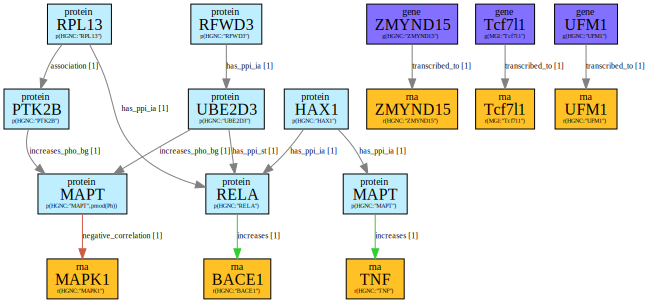

In [7]:
search_path(end_node_class="rna", limit=3)

## Search by namespace

### start

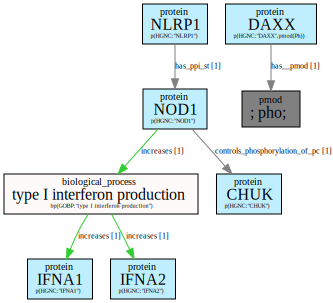

In [8]:
search_path(start_node_namespace="HGNC", limit=2)

### end

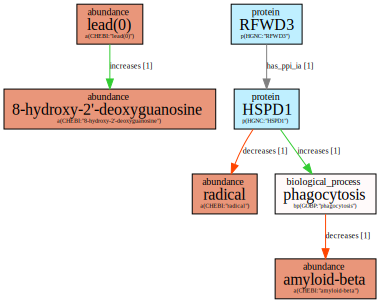

In [9]:
search_path(end_node_namespace="CHEBI", limit=1)

## Search by node name

### start

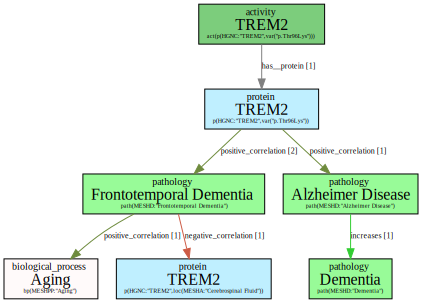

In [10]:
search_path(start_node_name="TREM2", limit=3)

### end

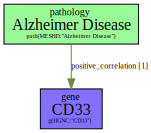

In [11]:
search_path(end_node_name="CD33", max_path_length=1, limit=1)

## Path length

You can define the path length by:
* `min_path_length` (default=1)
* `max_path_length` (default=3)

`max_path_length` maximal value is 10

### Range

Following search will search 1 (default) to 2 relations per path


> search_path(min_path_length=1, connecting_relation='causal', ***max_path_length=2***, limit=2)


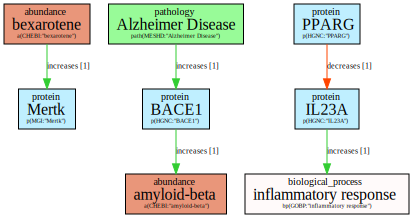

In [12]:
search_path(min_path_length=1, connecting_relation='causal', max_path_length=2, limit=2)

Following search will search 2 to 5 relations per path

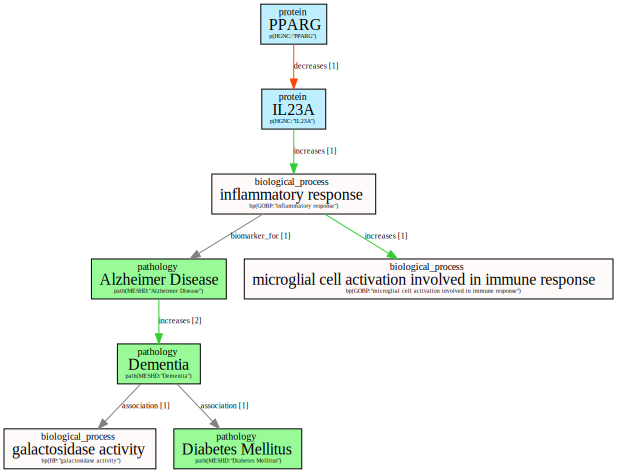

In [13]:
search_path(min_path_length=3, max_path_length=5, connecting_relation='bel_relation', limit=2)

### Excat

exact path length 4

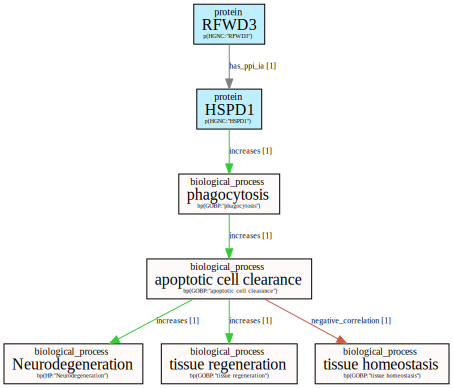

In [14]:
search_path(min_path_length=4, max_path_length=4, limit=3)

## Relations on path

### BEL

#### Relation types

***Basic BEL relation types*** in *e(BE:L)* represents relations following the BEL grammar defined [here](https://language.bel.bio/language/reference/2.1.0/relations/)

The only difference to the BEL syntax is, that we use **snake_case** instead of **camelCase** style for all nodes and relation classes. Basic relation types are ...

In [15]:
print(', '.join({k for k,v in get_api_results("bel/relation_types").items() if v['abstract']==False}))

directly_decreases, analogous_to, has_variant, positive_correlation, regulates, biomarker_for, acts_in, causes_no_change, translocates, decreases, prognostic_biomarker_for, no_correlation, includes, increases, rate_limiting_step_of, directly_increases, has_modification, has_product, reactant_in, transcribed_to, negative_correlation, translated_to, association


example `increases`

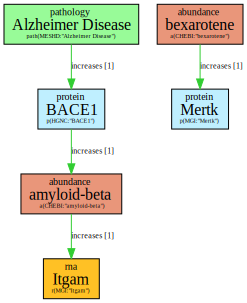

In [16]:
search_path(connecting_relation='increases', limit=1)

example `decreases`

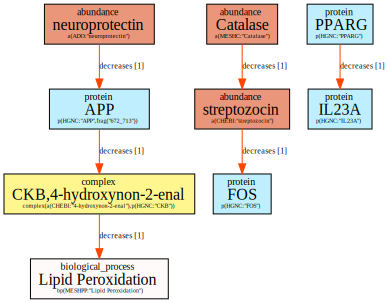

In [17]:
search_path(connecting_relation='decreases', limit=1)

example mutiple relation types

#### Relation groups

Following the BEL grammar we allow to search for groups of relation tyles:

##### causal

`causal` is an abstract parent relation type which comprises ...

In [18]:
[x['name'] for x in get_api_results("bel/relation_types")['causal']['children']]

['increases',
 'decreases',
 'causes_no_change',
 'regulates',
 'directly_decreases',
 'rate_limiting_step_of',
 'directly_increases']

For more information on hierarchical tree structure of node and relations got to section [Hierarchical tree structure of relation and node types](#Hierarchical-tree-structure-of-relation-and-node-types)

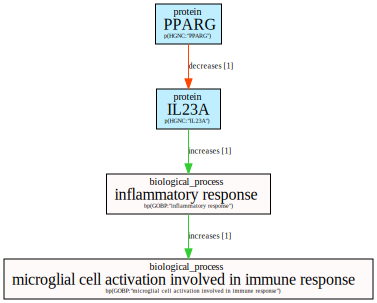

In [19]:
search_path(connecting_relation='causal', limit=1)

##### correlative

Abstract prarent relation type `correlative` comprises ...

In [20]:
[x['name'] for x in get_api_results("bel/relation_types")['correlative']['children']]

['association',
 'negative_correlation',
 'positive_correlation',
 'no_correlation']

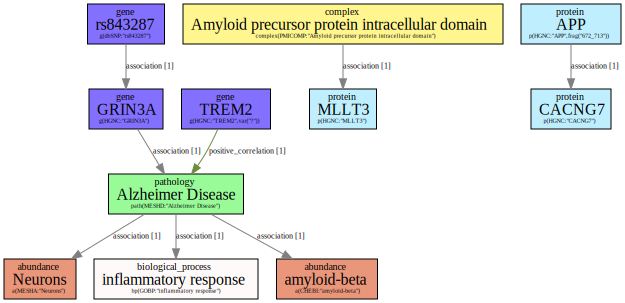

In [21]:
search_path(connecting_relation='correlative', limit=3)

##### genomic

Abstract prarent relation type `genomic` comprises ...

In [22]:
[x['name'] for x in get_api_results("bel/relation_types")['genomic']['children']]

['transcribed_to', 'translated_to']

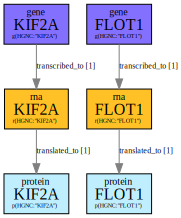

In [23]:
search_path(connecting_relation='genomic', min_path_length=2,max_path_length=2, limit=2)

##### deprecated

Abstract prarent relation type `deprecated` comprises ...

In [24]:
[x['name'] for x in get_api_results("bel/relation_types")['deprecated']['children']]

['analogous_to', 'prognostic_biomarker_for', 'biomarker_for']

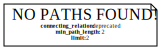

In [25]:
search_path(connecting_relation='deprecated', min_path_length=2, limit=2)

##### compiler

For historical reasons still this meta relation type exists but should no longer be used. ***e(BE:L)*** has an much more sophisticated system to automatically extend specific node like complexes and reactions.

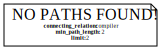

In [26]:
search_path(connecting_relation='compiler', min_path_length=2, limit=2)

### e(BE:L)

The ***e*** in ***e(BE:L)*** stand for extension of BEL and offers many more relation types which represents the extension of BEL by several databases like BioGrid, String, ...

#### Nodes

extra e(BE:L) nodes listed here

In [27]:
ebel_nodes = sorted(list(get_api_results('ebel/node_types').keys()))
ebel_nodes

['drug',
 'drug_db',
 'ebel',
 'fragment',
 'from_location',
 'gmod',
 'location',
 'pmod',
 'products',
 'reactants',
 'side_effect',
 'snp',
 'to_location',
 'variant']

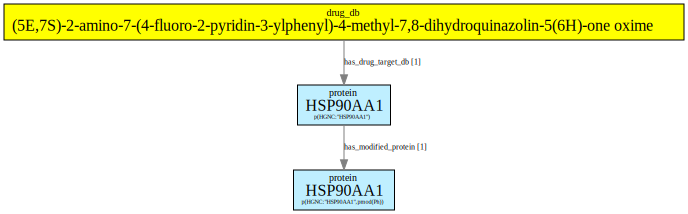

In [28]:
search_path(start_node_class='drug_db', max_path_length=2, limit=1)

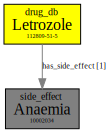

In [29]:
search_path(start_node_class='ebel', end_node_class='side_effect', max_path_length=1, limit=1)

#### Relations

Following e(BE:L) relation types are available

In [30]:
relations = get_api_results('ebel/relation_types')
has_ppi_biogrid_relations = [x['name'] for x in relations['has_ppi_bg']['children']]
all_relations_without_has_ppi_bg_children = set(relations.keys()) - set(has_ppi_biogrid_relations)

In [31]:
print(all_relations_without_has_ppi_bg_children)

{'iuphar_interaction', 'has_modified_protein', 'controls_pmod_of_st', 'has_downstream_snp_gc', 'has_mapped_snp', 'has_upstream_snp_dgn', 'has__rna', 'has__products', 'has_snp', 'increases_me0_kg', 'has_action', 'ebel_relation', 'increases_ubi_kg', 'inhibits__iu', 'has__population', 'increases_gly_kg', 'gene_disease_association', 'disgenet_gene_disease', 'activates__iu', 'controls_expression_of_pc', 'has_variant_rna', 'has__to_location', 'has_located_rna', 'has__composite', 'has__micro_rna', 'antagonist_of__iu', 'has_located_micro_rna', 'has_ppi_ia', 'inhibits_gating__iu', 'has_snp_disgenet', 'increases_expression_of_st', 'has_drug_target', 'has__gene', 'has_variant_micro_rna', 'has_mapped_snp_cv', 'has_mapped_snp_dgn', 'has__complex', 'controls_expression_of_st', 'activates_st', 'has_modified_gene', 'decreases_expression_of_st', 'has_fragmented_protein', 'has_upstream_snp', 'has_located_abundance', 'controls_phosphorylation_of_pc', 'has_variant_obj', 'antibody_against__iu', 'has_ppi', 

Some examples

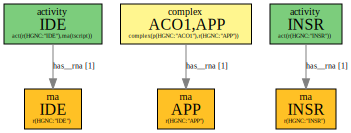

In [32]:
search_path(connecting_relation='has__rna', max_path_length=1, limit=3)

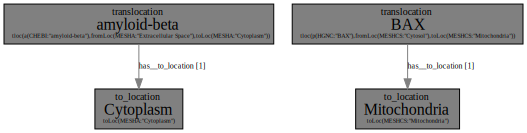

In [33]:
search_path(connecting_relation='has__to_location', 
            start_node_class='translocation', 
            end_node_class='to_location', 
            max_path_length=1, limit=2)

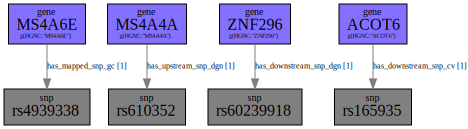

In [34]:
search_path(connecting_relation='has_snp', end_node_class='snp', max_path_length=1, limit=4)

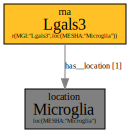

In [35]:
search_path(connecting_relation='has__location', max_path_length=1, limit=1)

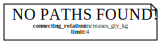

In [36]:
search_path(connecting_relation='increases_gly_kg', limit=4)

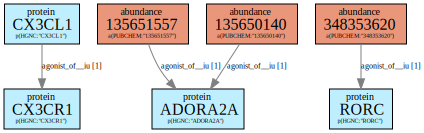

In [37]:
search_path(connecting_relation='agonist_of__iu', max_path_length=1, limit=4)

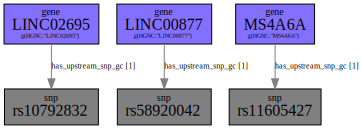

In [38]:
search_path(connecting_relation='has_upstream_snp_gc', max_path_length=1, limit=3)

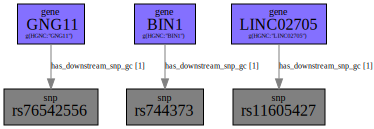

In [39]:
search_path(connecting_relation='has_downstream_snp_gc', max_path_length=1, limit=3)

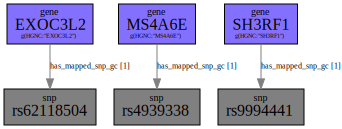

In [40]:
search_path(connecting_relation='has_mapped_snp_gc', max_path_length=1, limit=3)

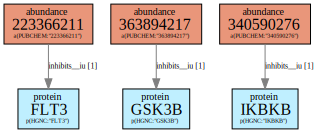

In [41]:
search_path(connecting_relation='inhibits__iu', max_path_length=1, limit=3)

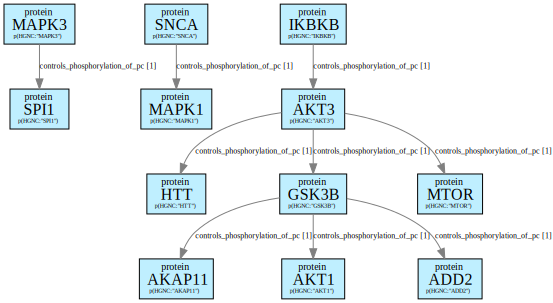

In [42]:
search_path(connecting_relation='controls_phosphorylation_of_pc', limit=3)

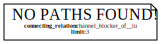

In [43]:
search_path(connecting_relation='channel_blocker_of__iu', limit=3)

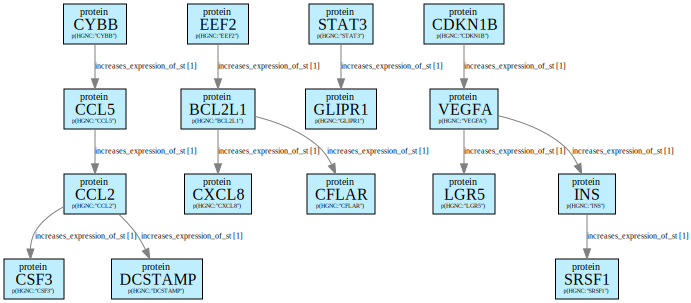

In [44]:
search_path(connecting_relation='increases_expression_of_st', limit=3)

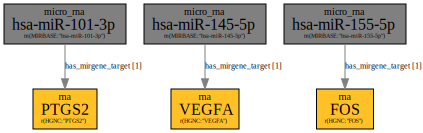

In [45]:
search_path(connecting_relation='has_mirgene_target', limit=3)

To understand the hierachical tree structure of e(BE:L) relation please go to [Hierarchical tree structure of relation and node types](#Hierarchical-tree-structure-of-relation-and-node-types)

To know which is the start(out) and the end(in) node we call the API function `ebel/relation_types`

In [46]:
get_api_results('ebel/relation_types')['has__rna']['in_out']

{'in': 'rna', 'out': 'V'}

Here are some examples

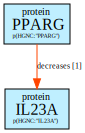

In [47]:
search_path(connecting_relation='causal', 
            max_path_length=1, 
            limit=1)

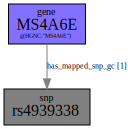

In [48]:
search_path(connecting_relation='has_mapped_snp', 
            start_node_class='gene', 
            end_node_class='snp', 
            max_path_length=1, 
            limit=1)

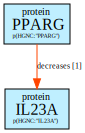

In [49]:
search_path(connecting_relation='causal', 
            max_path_length=1, 
            limit=1)

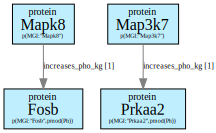

In [50]:
search_path(connecting_relation='pathway_interaction', limit=2)

### Mutiple relation types

combine 2 or more relation types

#### Combing BEL relations

***example***: Show all paths with 1-3 path length and maximun 5 results in each path length search. Show relation types `increases` and `decreases`

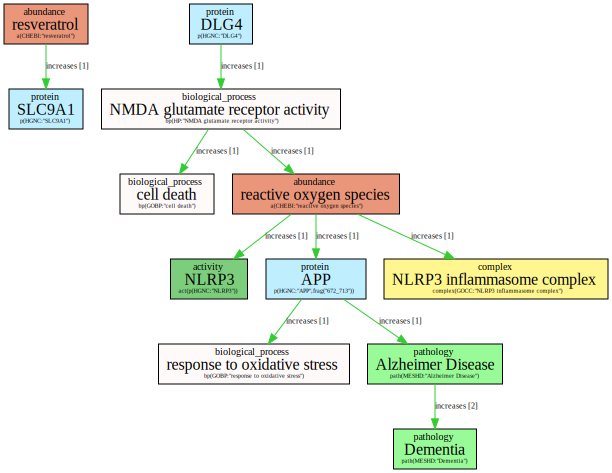

In [51]:
search_path(multiple_connecting_relations='decreases,increases', max_path_length=5, limit=2)

#### Combing e(BE:L) relations

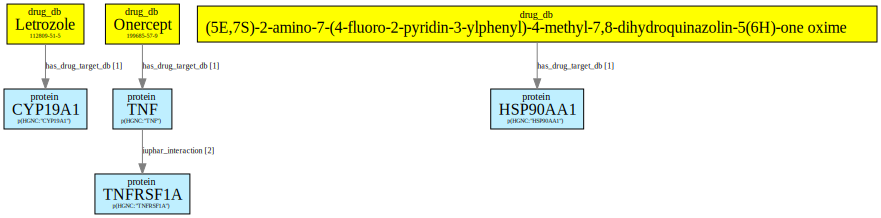

In [52]:
search_path(start_node_class='drug',
            multiple_connecting_relations='iuphar_interaction, has_drug_target', 
            max_path_length=5,limit=2)

#### Combing BEL and e(BE:L) relations

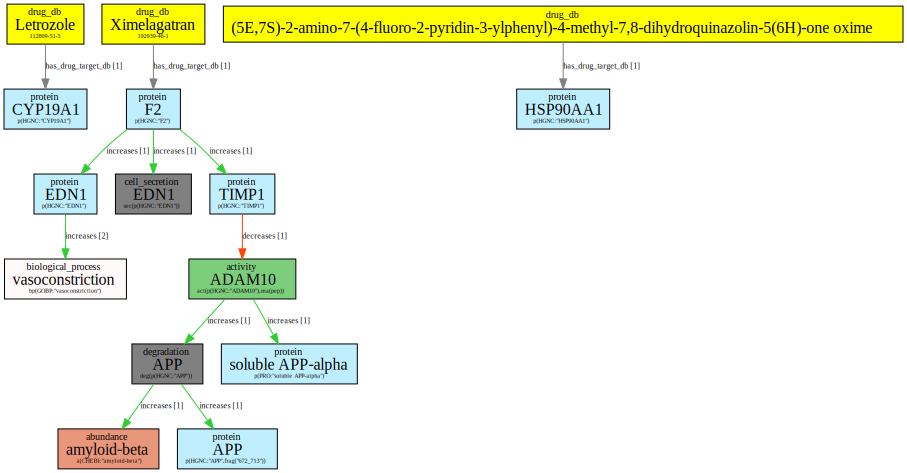

In [53]:
search_path(start_node_class='drug',
            multiple_connecting_relations='iuphar_interaction, has_drug_target, increases, decreases', 
            max_path_length=5,limit=2)

## Search by PubMed Identifier(s)

Get example PubMed Identifier

In [54]:
pmids = json.loads(requests.get(api_base + "/bel/pmids").text)
pmids_10_30 = [x['pmid'] for x in pmids if 10 <= x['number_of_edges'] <= 30]
example_pmid = pmids_10_30[0]
example_pmids_comma_seperated = ','.join([str(x) for x in pmids_10_30[:3]])

### Serach for a single PubMed Identifier

Search for PubMed ID: 24879954


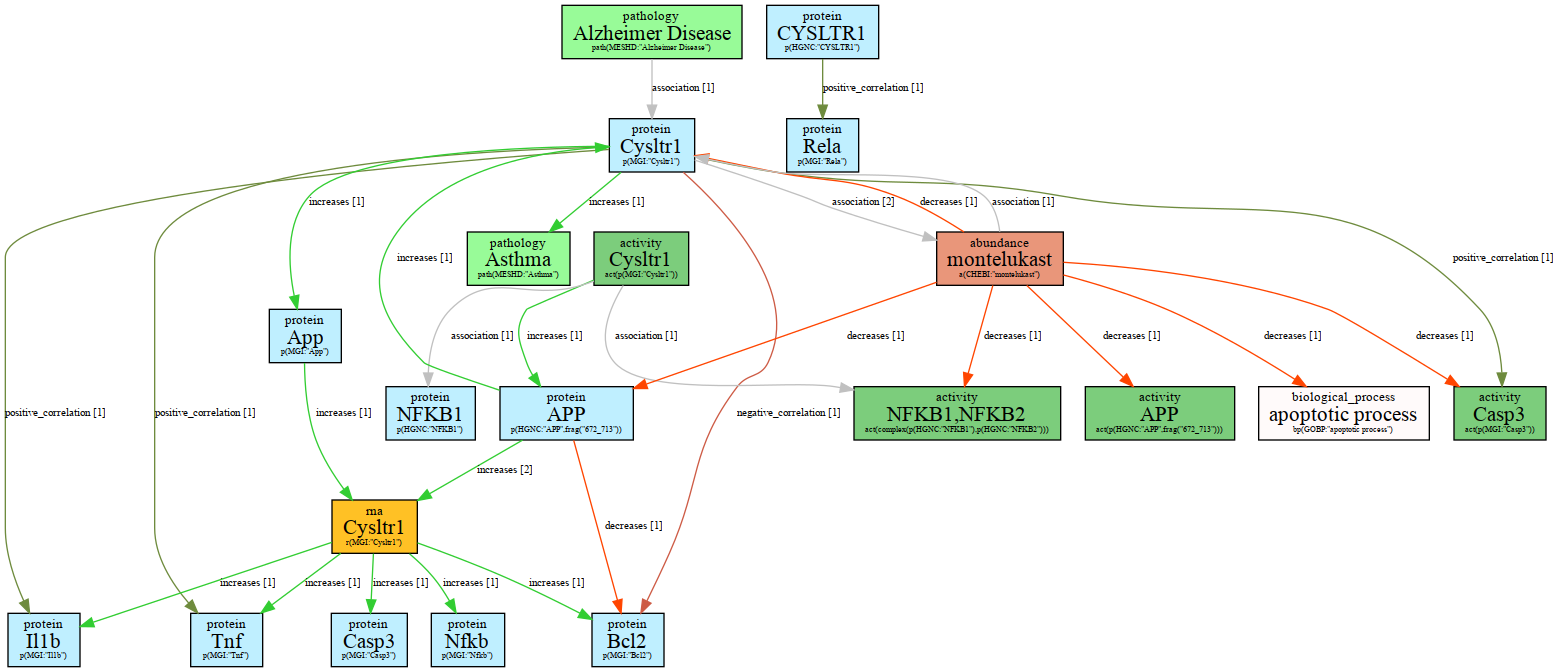

In [55]:
print('Search for PubMed ID:', example_pmid)
search_path(pmid=example_pmid, as_image=True)

### Search for a list of PubMed Identifiers

Search for comma seperated PubMed ID list: 24879954,28714976,21119889


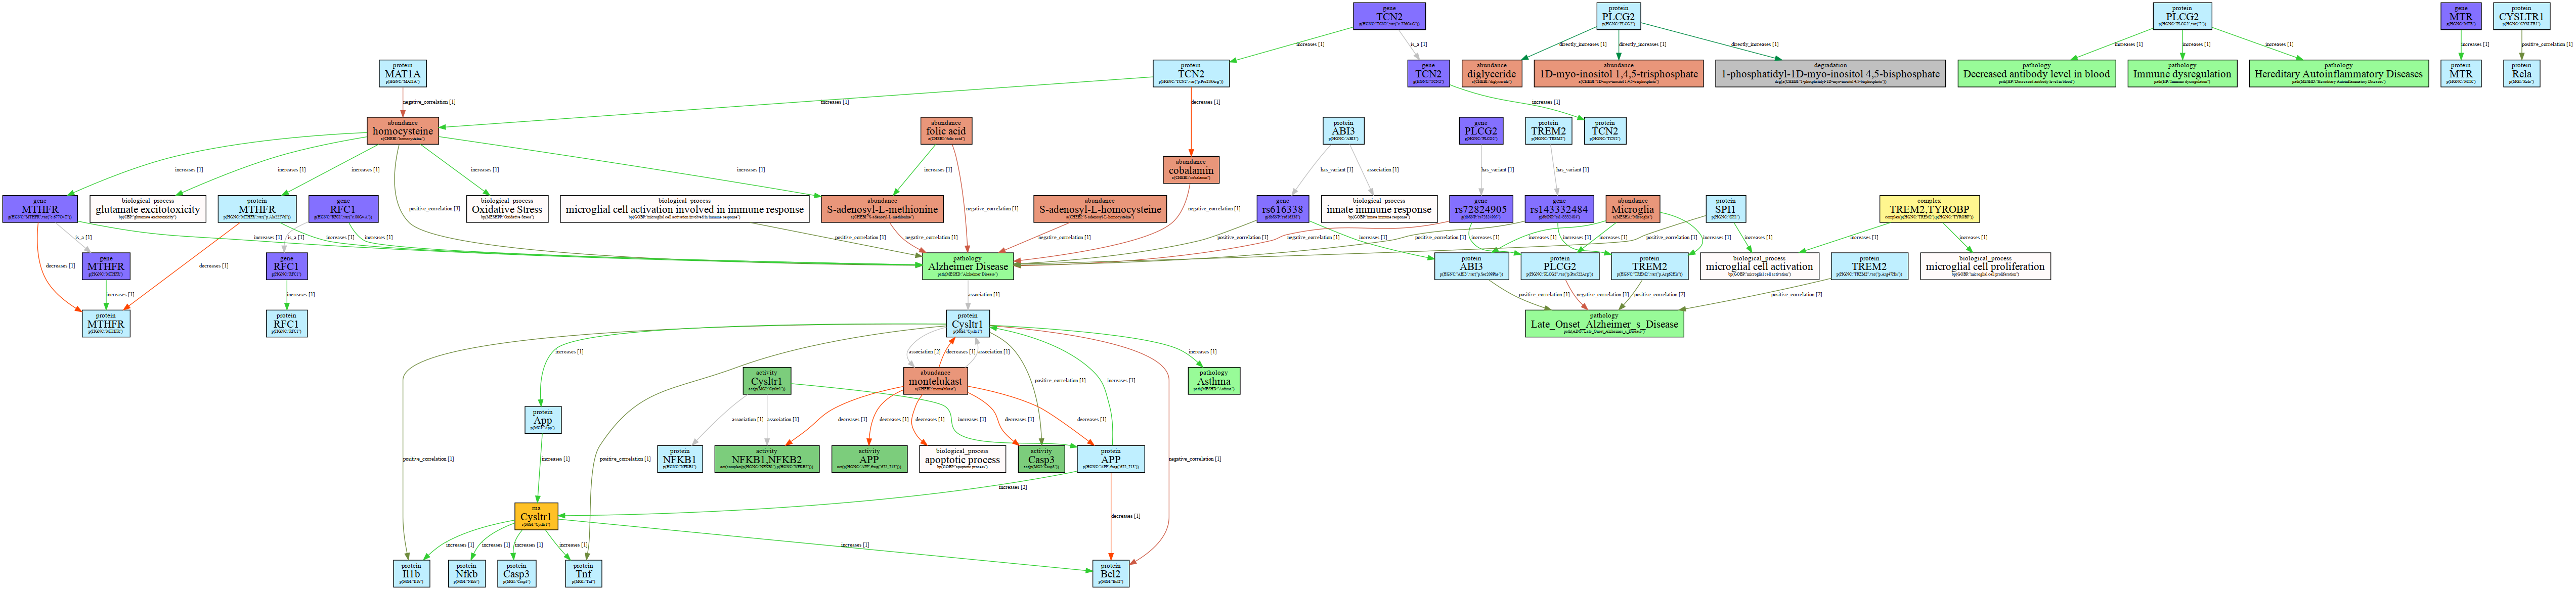

In [56]:
print('Search for comma seperated PubMed ID list:', example_pmids_comma_seperated)
search_path(pmid=example_pmids_comma_seperated, as_image=True)

## Avoiding meta nodes
If you set `only_gene_related_nodes_on_path` = 'true' e(BE:L) avoids nodes on path which are not connected to a gene, rna or protein. But protein complexes for example are included because they are connecetd to protein via the e(BE:L) relation `has__protein`.

Why you should avoid nodes not connected to genes? Because node classes like `biological_process` often have a high connectivity to other nodes and can be considered as ***meta*** nodes which hides relations between "real" physical biological objects.

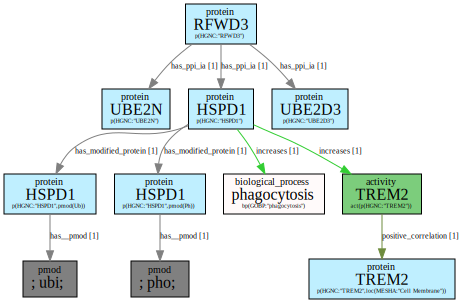

In [57]:
search_path(only_gene_related_nodes_on_path='true',limit=3)

## Search by by MeSH term(s)

get MeSH example terms

In [58]:
mts = requests.get(f"{api_base}bel/annotation_terms", params={'annotation_key': "mesh"}).json()
mesh_term_list = [x['annotation_term'] for x in mts if x['number_of_edges'] < 30 and x['number_of_edges'] > 20]
example_mesh_term = mesh_term_list[0]

In [59]:
example_mesh_terms_semicolon_seperated = ';'.join(mesh_term_list[:3])

### single term

Muscle, Skeletal


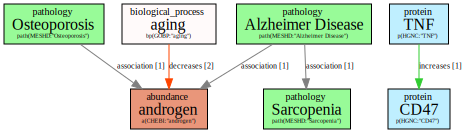

CPU times: user 10.2 ms, sys: 15.3 ms, total: 25.6 ms
Wall time: 1.47 s


In [60]:
print(example_mesh_term)
%time search_path(mesh_term=example_mesh_term, max_path_length=1, limit=6)

### list of terms

First 6 relations linked to one of the publications annotated with on of the following MeSH terms: Muscle, Skeletal;T-Lymphocytes;Sex Factors


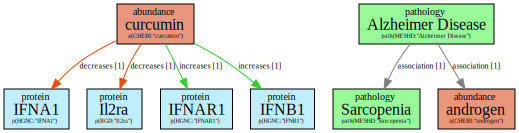

In [61]:
print('First 6 relations linked to one of the publications annotated with on of the following MeSH terms:', example_mesh_terms_semicolon_seperated)
search_path(mesh_term=example_mesh_terms_semicolon_seperated, max_path_length=1, limit=6)

## BELish

***BELish*** is a query language for BEL and e(BE:L) to searches pathways in knowledge graphs.

***BELish*** in general follows the BEL syntax with some exceptions:

1. BELish always uses the short form for functions if available (e.g. **p** instaed if  *protein*, see also below table *[BELish for nodes](#BELish-for-nodes)*)
2. BEL nodes are written without any spaces beetween syntax elements (e.g. **p(HGNC:"CD33")** instead of *p(HGNC: "CD33")*)
3. ***%*** can be used as an wildcard (e.g. **p(HGNC:"%")** for all (human) proteins in the namespace *HGNC*)
4. Relation types are witten in ***snake_case*** instead of camelCase style (e.g. ***increases_directly*** instead of *increasesDirectly*, see also below table *[BELish for relations](#BELish-for-relations)*)
5. Relations can have forward and backward direction (even in the same BELish query). To enable this, we write relation in the following way:
    * schema:
        * forward: ```-relation_type->```
        * backward: ```<-relation_type-```
    * example:
        * forward: *p(%) -increases-> p(%)*
        * backward: *p(%) <-increases- p(%)*  
6. Instead of using BEL you can also use the class name of the node in square brackets
    * schema: \[node_class_name\] -relation_type-> \[node_class_name\]
    * example: \[drug\] -has_drug_target-> \[protein\] 

### BELish for nodes

Minimum for a BEL node is the function and the following a wildcard % in brackets.

schema: BELish(%)

for example

> bp(%)

| BELish | BEL(short/long) | &#128279; link | descrption |
| ---- | ---- | ---- | ---- |
| a | a/abundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/abundance/) | Chemical or drug abundance
| act | act/activity | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/activity/) | denotes activity of protein, RNA, complex
| bp | bp/biologicalProcess | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/biologicalprocess/) | biological processes
| sec | sec/cellSecretion | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/cellsecretion/) | denote secretion of abundance from the cell
| surf | surf/cellSurfaceExpression | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/cellsurfaceexpression/) | expresses an abundance moved to the cellular surface
| complex | complex/complexAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/complexabundance/) | Complex of biological/chemical abundances
| composite | composite/compositeAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/compositeabundance/) | Not a complex but a set of abundances that together produce an effect
| deg | deg/degradation | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/degradation/) | denotes degradation of an abundance
| frag | frag/fragment | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/fragment/) | modifier function for protein fragments
| fus | fus/fusion | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/fusion/) | modifier function for biomolecule fusions
| g | g/geneAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/geneabundance/) | Gene abundance
| loc | loc/location | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/location/) | modifier function for abundance location
| m | m/microRNAAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/micrornaabundance/) | microRNA abundance
| ma | ma/molecularActivity | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/molecularactivity/) | modifier function – specifies specific type of activity
| path | path/pathology | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/pathology/) | pathologies - disease or pathological process
| pop | pop/populationAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/populationabundance/) | population abundance
| p | p/proteinAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/proteinabundance/) | protein abundance
| pmod | pmod/proteinModification | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/proteinmodification/) | modifier function for protein modifications
| rxn | rxn/reaction | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/reaction/) | reaction function - reactants and products
| r | r/rnaAbundance | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/rnaabundance/) | RNA abundance
| tloc | tloc/translocation | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/translocation/) | denotes movement of abundance from one location to another
| var | var/variant | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/functions/variant/) | modifier function for gene/RNA/protein variants



### BELish for relations

| BELish | BEL(short/long) | &#128279; link | descrption |
| ---- | ---- | ---- | ---- |
| analogous | /analogous | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/analogous/) | Deprecated – A is analogous to B
| association | --/association | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/association/) | A is associated with B - least informative relationship
| biomarker_for | /biomarkerFor | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/biomarkerfor/) | Deprecated – A is a biomarker for B
| causes_no_change | cnc/causesNoChange | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/causesnochange/) | A causes no change in B
| decreases | -|/decreases | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/decreases/) | A indirectly decreases B
| directly_decreases | =\|/directlyDecreases | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/directlydecreases/) | A directly decreases B
| directly_increases | =\|/directlyIncreases | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/directlyincreases/) | A directly increases B
| has_activity | /hasActivity | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/hasactivity/) | A has activity B, e.g. kinase activity
| has_component | /hasComponent | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/hascomponent/) | A has component B (for complexes)
| has_components | /hasComponents | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/hascomponents/) | A has components list(B, C, D, …)
| has_member | /hasMember | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/hasmember/) | A has a member B
| has_members | /hasMembers | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/hasmembers/) | A has members list(B, C, D, …)
| increases | ->/increases | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/increases/) | A indirectly increases B
| is_a | -/isA | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/isa/) | A is a subset of B
| negative_correlation | neg/negativeCorrelation | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/negativecorrelation/) | A is negatively correlated with B
| orthologous | -/orthologous | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/orthologous/) | A is orthologous to B
| positive_correlation | pos/positiveCorrelation | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/positivecorrelation/) | A is positively correlated with B
| prognostic_biomarker_for | -/prognosticBiomarkerFor | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/prognosticbiomarkerfor/) | Deprecated – A is a prognostic biomarker for B
| rate_limiting_step_of | -/rateLimitingStepOf | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/ratelimitingstepof/) | A is a rate limiting step of B
| regulates | reg/regulates | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/regulates/) | A regulates (effects) B somehow
| sub_process_of | -/subProcessOf | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/subprocessof/) | A is a subprocess of B
| transcribed_to | :>/transcribedTo | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/transcribedto/) | gene is transcribed to RNA
| translated_to | >>/translatedTo | [ &#128279;](https://language.bel.bio/language/reference/2.1.0/relations/translatedto/) | RNA is translated to protein

### Examples

Before we start we extract one example from the knowledge base

#### One edge forward

get example with path length 1 and print

In [62]:
belish1 = get_example_multi_bel(path_length=1)
belish1

'p(HGNC:"PPARG") -decreases-> p(HGNC:"IL23A")'

search with this BELish string

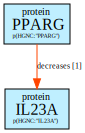

In [63]:
search_path_by_belish(belish=belish1, limit=1)

#### One edge backward

get an edge and build example BELish string

In [64]:
e = get_api_results('bel/edges', relation='increases', page_size=1)['results'][0]
belish1_reverse = f"{e['object_bel']} <-{e['relation']}- {e['subject_bel']}"
belish1_reverse

'bp(GOBP:"inflammatory response") <-increases- p(HGNC:"TREM2",loc(MESHA:"Extracellular Space"))'

Now use our BELish example as imput

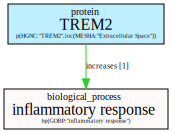

In [65]:
search_path_by_belish(belish=belish1_reverse, limit=1)

#### Using wildcards (%)

search a protein which increases another protein

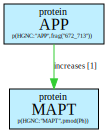

In [66]:
search_path_by_belish(belish='p(%) -increases-> p(%)', limit=1)

search a protein which increases the phoyphorylation of another protein

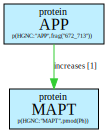

In [67]:
search_path_by_belish(belish='p(%) -increases-> p(HGNC:"%",pmod(Ph%)', limit=1)

#### Box Nodes

***Box nodes*** are node label in a box with parameters

A more complex question answered here:

Search for all proteins (not MAPT or APP) which have a direct interaction with MAPT with confidence_value > 0.8 and are a drug target (indication Alzheimer)

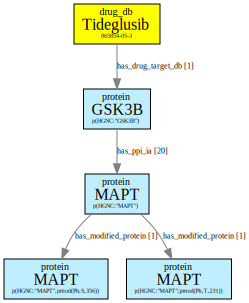

In [68]:
belish='''[protein name=MAPT] 
<-has_modified_protein- [protein] 
<-has_ppi_ia interaction_type="direct interaction" confidence_value>0.8- [protein name!=MAPT name!=APP] 
<-has_drug_target- [drug indication~"%Alzheimer%"]'''
search_path_by_belish(belish, limit=40)

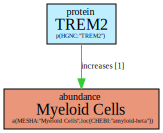

In [69]:
search_path_by_belish(belish='[protein name=TREM2 namespace=HGNC] -increases-> [bel]', limit=1)

##### Simple node classes

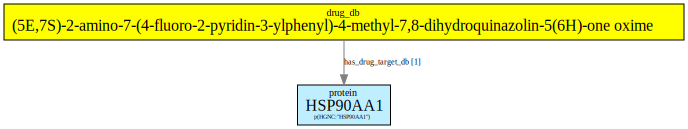

In [70]:
search_path_by_belish(belish='[drug_db] -has_drug_target-> [protein]', limit=1)

##### Node class groups

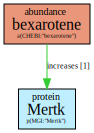

In [71]:
search_path_by_belish(belish='[bio_object] -increases-> [bio_object]', limit=1)

##### with parameters

There are some simple rules to query the nodes with parameters

###### Equals

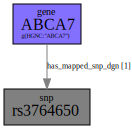

In [72]:
search_path_by_belish(belish='[gene namespace=HGNC] -has_snp-> [snp]', limit=1)

###### Starts with

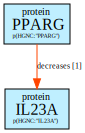

In [73]:
search_path_by_belish(belish='[protein] -causal-> [protein name~IL%]', limit=1)

###### Ends with

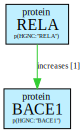

In [74]:
search_path_by_belish(belish='[protein name~%A] -increases-> [protein]', limit=1)

###### Contains

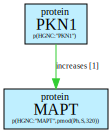

In [75]:
belish='[protein label~%kinase%] -increases-> [protein]'
search_path_by_belish(belish, limit=1)

Check if this is really true.

In [76]:
paths = get_api_results('bel/paths_by_belish', belish=belish, limit=1)
subject_rid = list(paths['unique_edges'].values())[0]['subject_rid']
paths['unique_nodes'][subject_rid]['label'], paths['unique_nodes'][subject_rid]['bel']

('Serine/threonine-protein kinase N1', 'p(HGNC:"PKN1")')

###### Serach in list (using *)

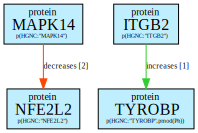

In [77]:
belish=f'[protein reactome_pathways*"Neutrophil degranulation"] -causal-> [protein]'
search_path_by_belish(belish, limit=3)

###### Search for phrases (surround by double quotes)

Can also be combined with ~ operator and % as wildcard

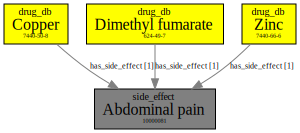

In [78]:
search_path_by_belish(belish='[drug] -has_side_effect-> [side_effect label="Abdominal pain"]', limit=3)

#### Several edges

Get BELish example with 4 edges in one statement

In [79]:
belish_multi = get_example_multi_bel(path_length=4)
belish_multi

'p(HGNC:"PPARG") -decreases-> p(HGNC:"IL23A") -decreases-> bp(GOBP:"inflammatory response") -decreases-> bp(GOBP:"microglial cell activation involved in immune response") -decreases-> path(MESHD:"Inflammation")'

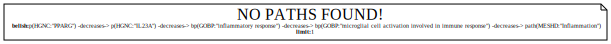

In [80]:
search_path_by_belish(belish=belish_multi, limit=1)

#### Edges with optional relation types

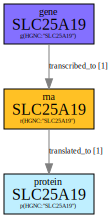

In [81]:
search_path_by_belish('g(%) -transcribed_to,translated_to-> r(%) -transcribed_to,translated_to-> p(%)', limit=1)

Note that depending on the relationship the correct relation type is selected (transcribed_to,translated_to)

#### Relation type groups

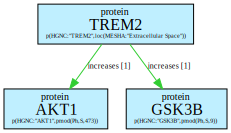

In [82]:
 search_path_by_belish('[bel] -causal pmid=28209725 evidence~"%serine 473%"-> [bel]', limit=20)

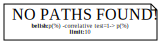

In [83]:
 search_path_by_belish('p(%) -correlative test=1-> p(%)', limit=10)

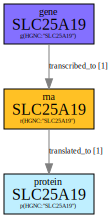

In [84]:
 search_path_by_belish('g(%) -genomic-> r(%) -genomic-> p(%)', limit=1)

Complex example using different directions, wildcards and relation type groups

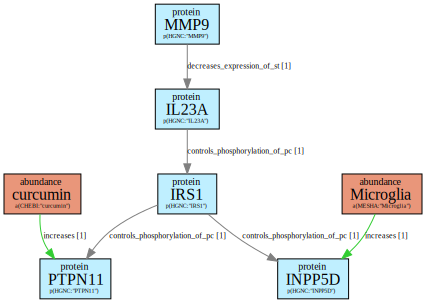

In [85]:
belish = '''p(%) -decreases_expression_of-> p(%)
                 -controls_phosphorylation_of_pc-> p(%) 
                 -ebel_relation-> p(%) 
                 <-causal- a(%)'''
search_path_by_belish(belish, limit=2)

## No results

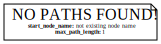

In [86]:
search_path(start_node_name='not existing node name', max_path_length=1)

## Using limit

Paramter `limit` is a usefull paramter to get an impression of query results/graphs. You can avoid server rejections if your query will result in too big graphs. You will avoid responses like the following:

search_path(start_node_class='protein')
```python
{'error': 'We found too many unique edges (3577, max allowed=1000 ) with an '
          'allowed maximum of 100000 paths. Please specify you query and run '
          'again. Decrease max path length or state start and end node more '
         'precisely.'}
```

Using `limit` means that every path_length search is limited to `limit` number of edges. Because the graph is a summery of all edges respectively path length searches you will not seen exactly `limit` number of edges.

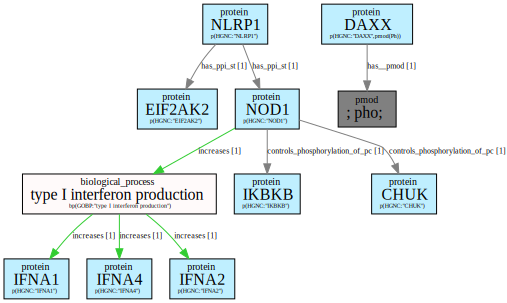

In [87]:
search_path(start_node_class='protein', limit=3)

## Hierarchical tree structure of relation and node types

### BEL node type

In [88]:
show_classes_as_table('bel/node')

,children,parents_path,abstract
name,,,
abundance,[],"[bio_object, bel]",False
activity,[],"[bio_act, bel]",False
bel,"[fusion_rna, bio_object, fusion_gene, bio_act,...",[],True
bio_act,"[cell_secretion, reaction, translocation, acti...",[bel],False
bio_concept,"[pathology, biological_process]",[bel],True
bio_list,"[composite, list]",[bel],True
bio_object,"[population, genetic_flow, micro_rna, abundanc...",[bel],True
biological_process,[],"[bio_concept, bel]",False
cell_secretion,[],"[bio_act, bel]",False


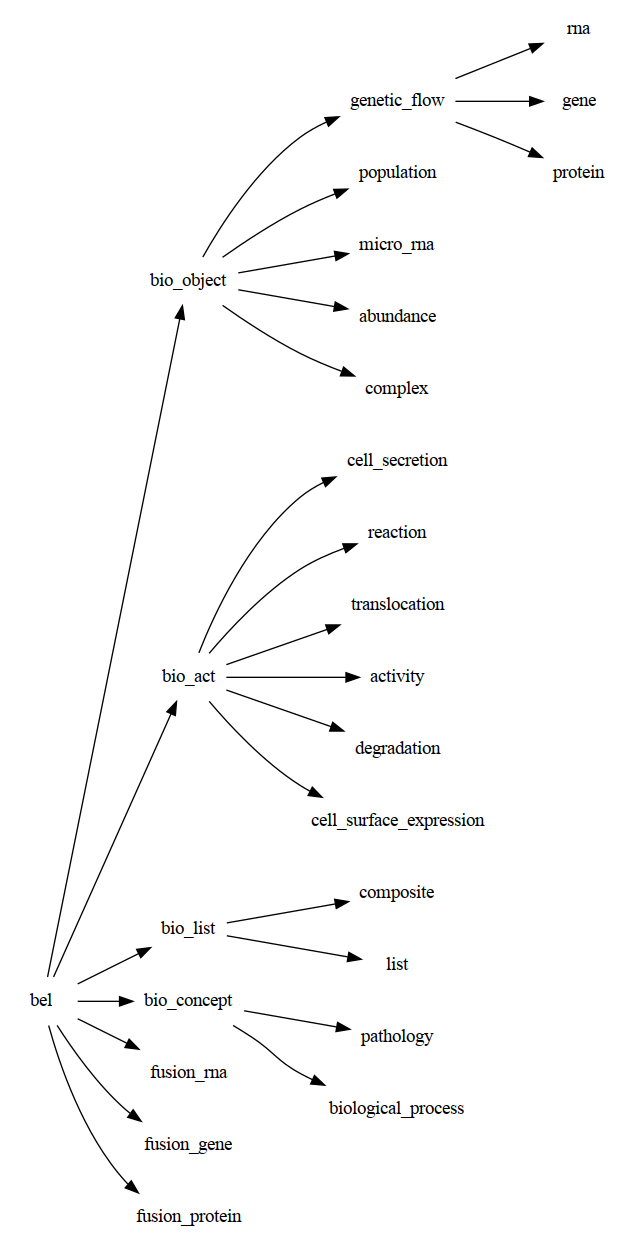

In [89]:
show_classes_as_graph('bel/node')

### BEL relation types

In [90]:
show_classes_as_table('bel/relation')

,children,parents_path,abstract
name,,,
acts_in,[],"[compiler, bel_relation]",False
analogous_to,[],"[deprecated, bel_relation]",False
association,[],"[correlative, bel_relation]",False
bel_relation,"[compiler, correlative, causal, genomic, depre...",[],True
biomarker_for,[],"[deprecated, bel_relation]",False
causal,"[increases, decreases, causes_no_change, regul...",[bel_relation],True
causes_no_change,[],"[causal, bel_relation]",False
compiler,"[has_product, translocates, reactant_in, inclu...",[bel_relation],True
correlative,"[association, negative_correlation, positive_c...",[bel_relation],True


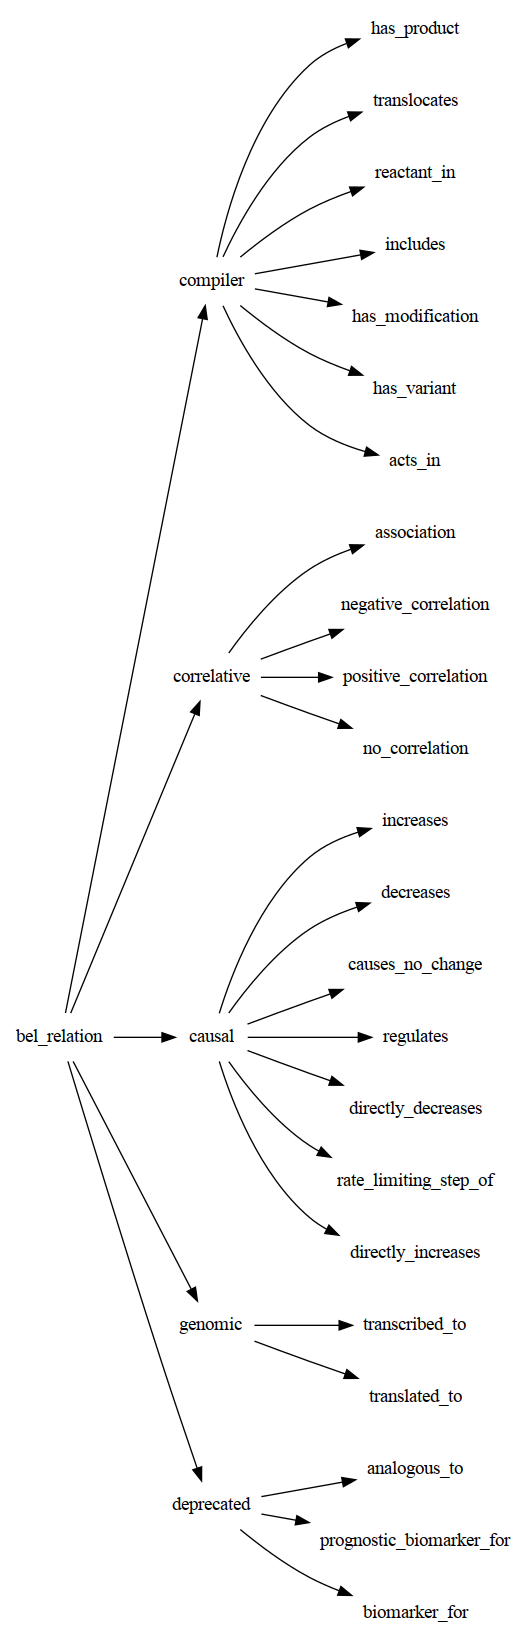

In [91]:
show_classes_as_graph('bel/relation')

### e(BE:L) node types

In [92]:
show_classes_as_table('ebel/node')

,children,parents_path,abstract
name,,,
drug,[drug_db],[ebel],True
drug_db,[],"[drug, ebel]",False
ebel,"[fragment, side_effect, location, gmod, reacta...",[],True
fragment,[],[ebel],False
from_location,[],[ebel],False
gmod,[],[ebel],False
location,[],[ebel],False
pmod,[],[ebel],False
products,[],[ebel],False


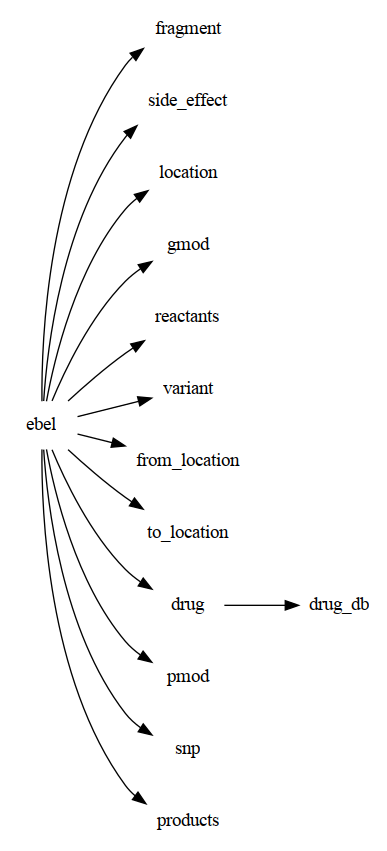

In [93]:
show_classes_as_graph('ebel/node')

### e(BE:L) relation types

In [94]:
show_classes_as_table('ebel/relation')

,children,parents_path,abstract
name,,,
activates__iu,[],"[iuphar_interaction, ebel_relation]",False
activates_st,[],"[has_action_st, has_action, ebel_relation]",False
agonist_of__iu,[],"[iuphar_interaction, ebel_relation]",False
allosteric_modulator_of__iu,[],"[iuphar_interaction, ebel_relation]",False
antagonist_of__iu,[],"[iuphar_interaction, ebel_relation]",False
...,...,...,...
inhibits__iu,[],"[iuphar_interaction, ebel_relation]",False
inhibits_gating__iu,[],"[iuphar_interaction, ebel_relation]",False
inhibits_st,[],"[has_action_st, has_action, ebel_relation]",False


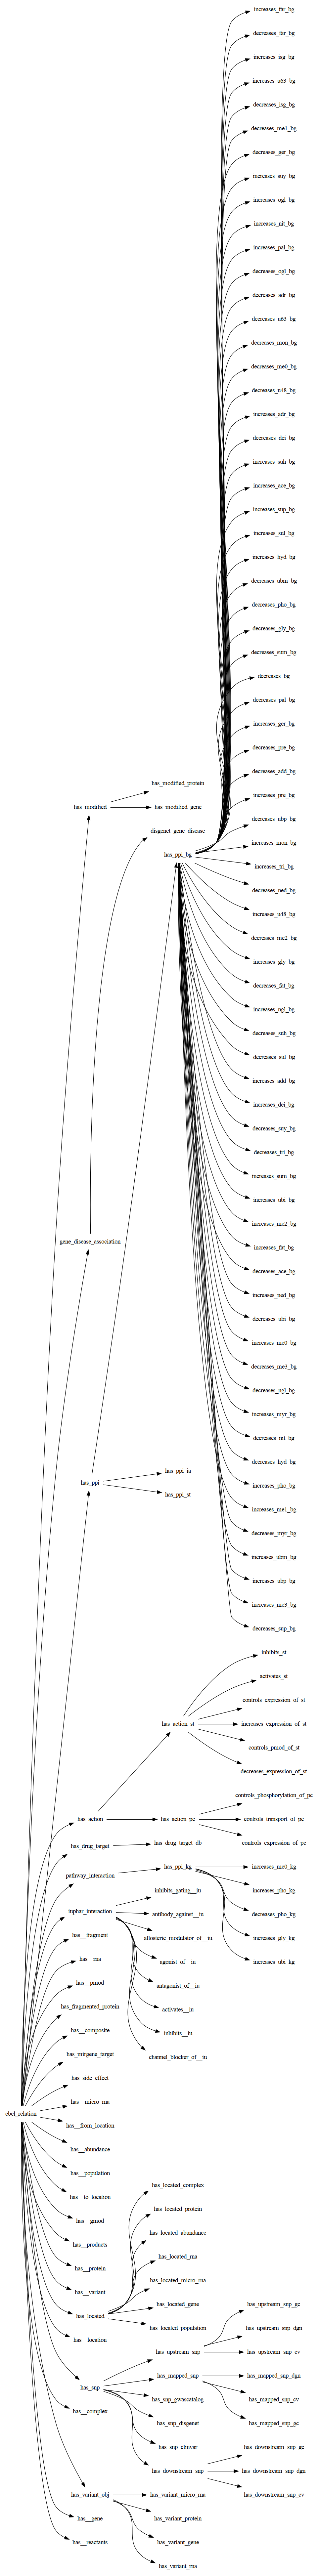

In [95]:
show_classes_as_graph('ebel/relation')